<a href="https://colab.research.google.com/github/eridanletalis/GB_nn/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполненное домашнее задание находится ниже кода, который был на лекции. Код был немного переделан, чтобы загрузить базу "Ирисы" из sklearn

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# можем дополнительно посмотреть процесс формирования весов
step1 = np.random.random((3,1))
print(step1, end='\n\n')
step2 = step1 - 1 
print(step2, end='\n\n')
step3 = 2 * step2
print(step3)

[[0.30233257]
 [0.14675589]
 [0.09233859]]

[[-0.69766743]
 [-0.85324411]
 [-0.90766141]]

[[-1.39533485]
 [-1.70648822]
 [-1.81532281]]


In [2]:
# вычисление сигмоид функции

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

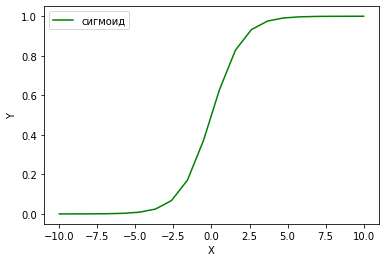

In [3]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,20)
Y = sigmoid(X)

plt.plot(X ,  Y ,'-g',label = 'сигмоид' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)

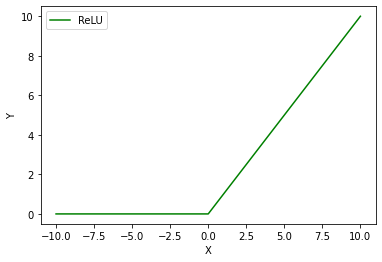

In [5]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,21)
Y = ReLU(X)

plt.plot(X ,  Y ,'-g',label = 'ReLU' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
''' 
Исходный код к уроку 1.
Демонстрация работы градиентного спуска 
'''

# первоначальное точка
start_point = 1

# размер шага(learning rate)
learn_r = 0.01

# установка первоначальной точности
precision = 0.0001

# функция градиента для y = X**4 - 3 * X**3 
gr_func = lambda x: 4 * x**3 - 9 * x**2

# для картинки
D  = 1

X = np.linspace(2.2-D,2.2+D,20)
Y = X**4 - 3 * X**3 

# начальная точка
next_point = start_point

iter = 0 

x = []
x.append(next_point)

Итерация: 1
Текущая точка 1| След-я точка 1.05
Дистан-я между текущей точк. и след. 0.050000000000000044
--------------------------------------------------------
Итерация: 2
Текущая точка 1.05| След-я точка 1.1029200000000001
Дистан-я между текущей точк. и след. 0.05292000000000008
--------------------------------------------------------
Итерация: 3
Текущая точка 1.1029200000000001| След-я точка 1.1587338168953165
Дистан-я между текущей точк. и след. 0.05581381689531639
--------------------------------------------------------
минимум 1.1587338168953165, количество затраченных итераций: 3


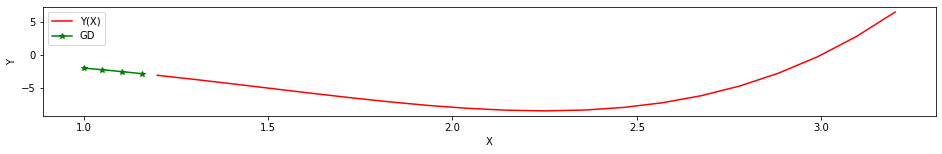

In [7]:

plt.figure(figsize=(16,2))
plt.plot(X,  Y ,'r',label = 'Y(X)' )

# количество итерация 
n = 3
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learn_r*gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    iter += 1

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {iter}")
    print(f"Текущая точка {current_point}| След-я точка {next_point}")
    print(f"Дистан-я между текущей точк. и след. {abs(current_point - next_point)}")
    print("--------------------------------------------------------")
    
    
    if(abs(current_point - next_point) <= precision):
        break

print(f"минимум {next_point}, количество затраченных итераций: {iter}") 
X_grad = np.array(x)
plt.plot(X_grad ,  (X_grad **4 - 3 * X_grad **3) ,'-*g',label = 'GD' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
'''
Исходный код к уроку 1.
Пример простой нейронной сети на numpy
'''

import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1


# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)

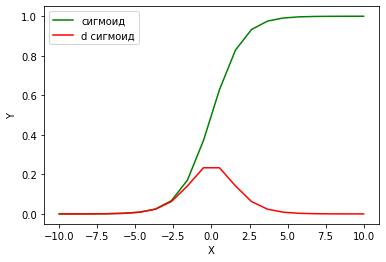

In [9]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,20)
Y = sigmoid(X)
dY = sigm_deriv(sigmoid(X))

plt.plot(X ,  Y ,'-g',label = 'сигмоид' )
plt.plot(X ,  dY ,'-r',label = 'd сигмоид' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение back-propagation
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))

        synaptic_weights += adjustments


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

In [13]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [14]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [15]:
# Добавляем для загрузки датасета из Интернет
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data['data'], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df['Species'] = None
df.iloc[:50]['Species'] = 'Iris-setosa'
df.iloc[50:100]['Species'] = 'Iris-virginica'
df.iloc[100:]['Species'] = 'Iris-versicolor'
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-versicolor


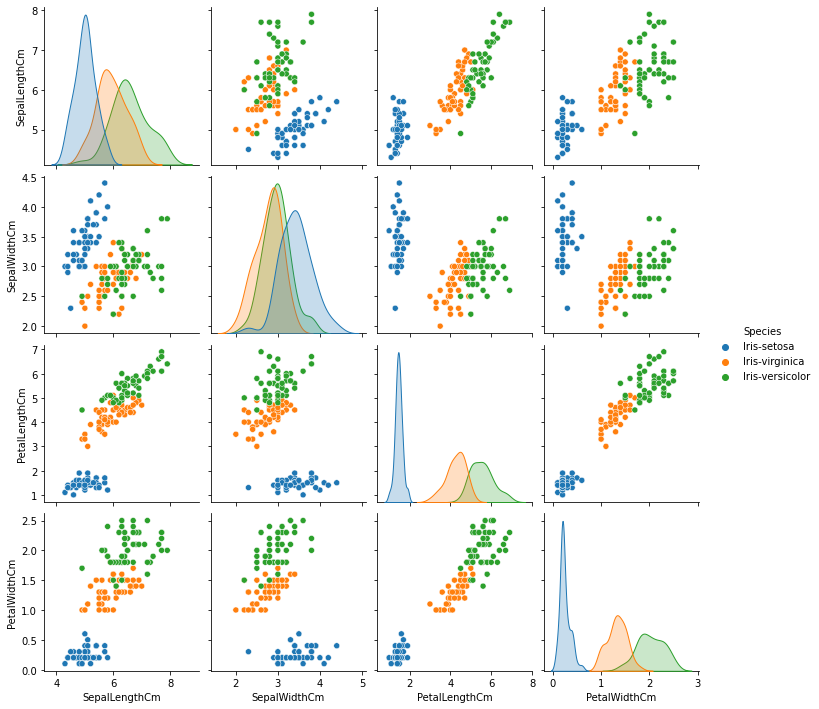

In [16]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
#iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

iris_data = df

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data, hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

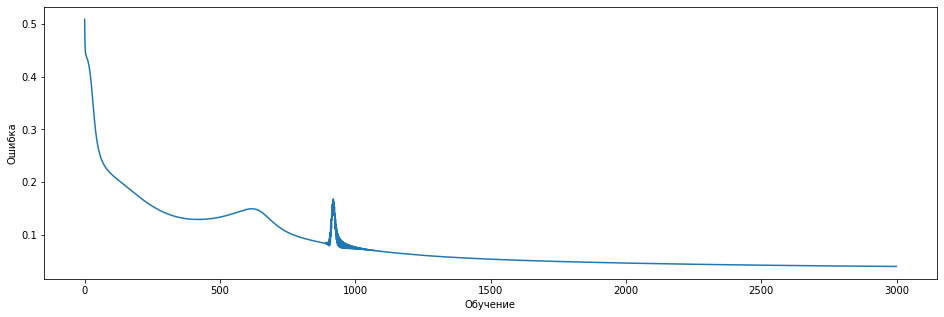

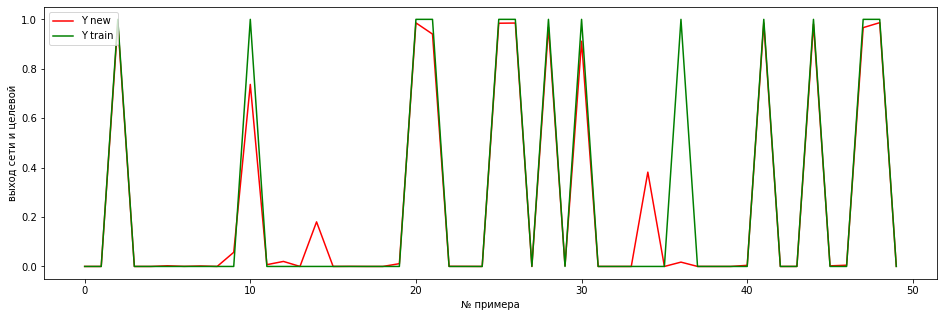

Аккуратность нейронной сети 96.01%


In [22]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода


# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



## **начало домашнего задания**

Для удобства работы обернём обучение и прямое распространение в функции.
Для начала проверим, что функции работают.

In [58]:

def test_nn_learning(X_train, y_train, 
                     learning_rate : float=0.1, neuron_numbs : int=5):
  # определим число нейронов скрытого слоя
  neuron_numb = neuron_numbs


  # присваевание случайных весов



  w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
  w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода


  # скорость обучения (learning rate)
  n = learning_rate

  # массив для ошибок, чтобы потом построить график
  errors = []

  # процесс обучения
  for i in range(20000):

      # прямое распространение(feed forward)
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w0))
      layer2 = sigmoid(np.dot(layer1, w1))

      # обратное распространение(back propagation) с использованием градиентного спуска
      layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
      layer2_delta = layer2_error * sigmoid_deriv(layer2)
      
      layer1_error = layer2_delta.dot(w1.T)
      layer1_delta = layer1_error * sigmoid_deriv(layer1)
      
      w1 += layer1.T.dot(layer2_delta) * n
      w0 += layer0.T.dot(layer1_delta) * n
      # метрика модели
      error = np.mean(np.abs(layer2_error))
      errors.append(error)
      accuracy = (1 - error) * 100
    
  return errors, accuracy, w0, w1, layer2

def test_nn_inference(w0, w1, X_test, y_test):
  layer0_t = X_test
  layer1_t = sigmoid(np.dot(layer0_t, w0))
  layer2_t = sigmoid(np.dot(layer1_t, w1))
  layer2_error_t = y_test - layer2_t  
  error_t = np.mean(np.abs(layer2_error_t))
  accuracy_t = (1 - error_t) * 100

  return accuracy_t, layer2_t

Начнём варьировать гиперпараметры существующей нейронной сети.
Зафиксируем число эпох на значении 20000, т.к. у этого параметра понятная кривая обучения: недообученность ИНС при малых числах эпох и очень низкий прирост точности (аккуратности) при большом числе эпох. Большое значение было выбрано, т.к. при уменьшении скорости обучения требуется больше итераций для достижения оптимальных значений. Для высоких значений коэффициента обучения при большом количестве эпох ожидаем после определённой эпохи практически параллельную оси абсцисс линию, т.к. значение ошибки почти не будет меняться.

В качестве изменяемых параметров примем число нейронов в скрытом слое и скорость обучения.

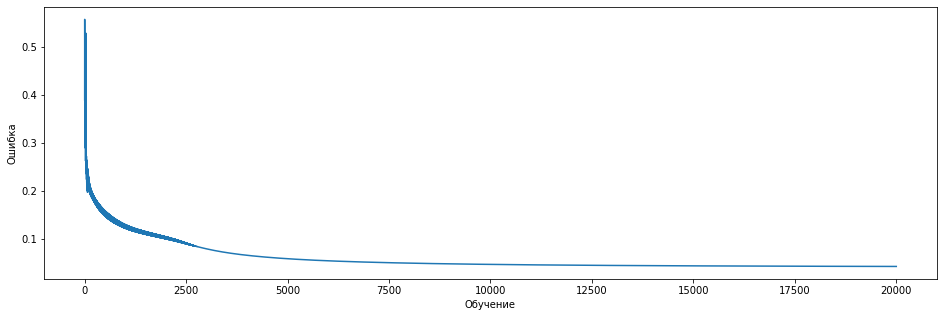

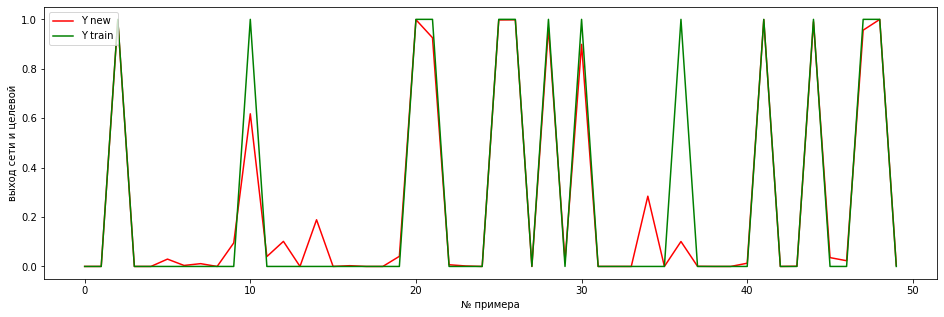

Аккуратность нейронной сети 95.83%


In [59]:
errors_tst,accuracy_tst, w0,w1, layer2_tst = test_nn_learning(
    X_train, y_train, 0.05, 150)

### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors_tst)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_tst[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy_tst,2)) + "%")

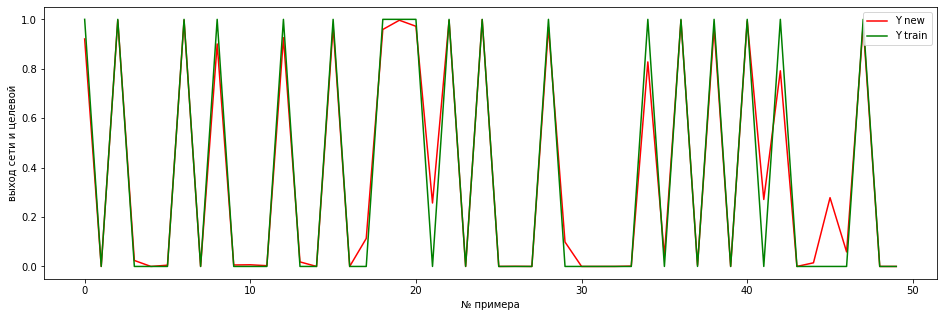

Аккуратность нейронной сети на тесте 97.64%


In [63]:
# прямое распространение(feed forward)

accuracy_t, layer2_t = test_nn_inference(w0, w1, X_test, y_test)    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Видим, что функции работают. План эксперимента следующий:
1. Изменяем число нейронов в скрытом слое от 1 до 20 с шагом 1 
2. Изменяем скорость обучения от 0.00 (0.01) до 1.5 с шагом 0.05

Запоминаем характеристики метрик.

In [ ]:
learning_rates = np.round(np.linspace(0,1.5,int(1.5/0.05)+1), 2)
learning_rates[0] = 0.01
neuron_counts = [x for x in range(1,21)]
train_result = pd.DataFrame(data=None, columns=(learning_rates), index=neuron_counts)
test_result = pd.DataFrame(data=None, columns=(learning_rates), index=neuron_counts)


for n_cnt in neuron_counts:
  for l_rate in learning_rates:
    _,accuracy_trn, w0, w1, _ = test_nn_learning(
    X_train, y_train, l_rate, n_cnt)
    accuracy_tst, _ = test_nn_inference(w0, w1, X_test, y_test)    
    print(l_rate, n_cnt, f'{accuracy_trn:.2f}%', f'{accuracy_tst:.2f}%')
    train_result.loc[n_cnt,l_rate] = accuracy_trn # результаты на тренировочном
    test_result.loc[n_cnt,l_rate] = accuracy_tst # резульататы на тестовом
  



Бегло осматривая получившиеся таблицы, можно сделать вывод:
Для набора данных Iris точность выше 95% процентов можно получить, используя 3 нейрона в скрытом слое. 
Большую роль в точности играет низкая скорость обучения: для малого числа нейронов скорость не должна превышать 0.15. Большое число нейронов более толерантно к изменению скорости в нашем диапазоне, но для бОльших скоростей тесты не проводились.
Это связано с тем, что при высокой скорости обучения мы не достигаме глобального оптимума, постоянно "промахиваясь" мимо него.

Построим графики поверхности, чтобы наглядно представить результаты.

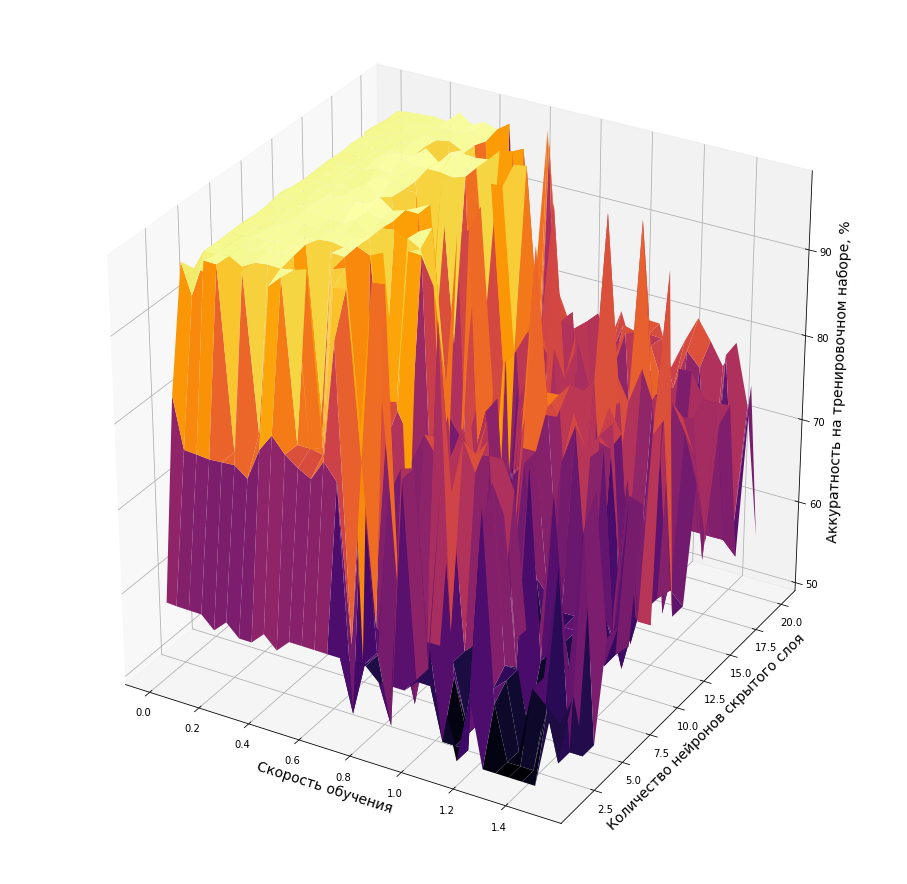

In [146]:
from mpl_toolkits.mplot3d import Axes3D

df = train_result.copy()

x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = np.array(df.values, dtype=np.float64)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Скорость обучения', fontsize=14)
ax.set_ylabel('Количество нейронов скрытого слоя', fontsize=14)
ax.set_zlabel('Аккуратность на тренировочном наборе, %', fontsize=14)
ax.plot_surface(X, Y, Z, cmap='inferno')

<Figure size 432x288 with 0 Axes>

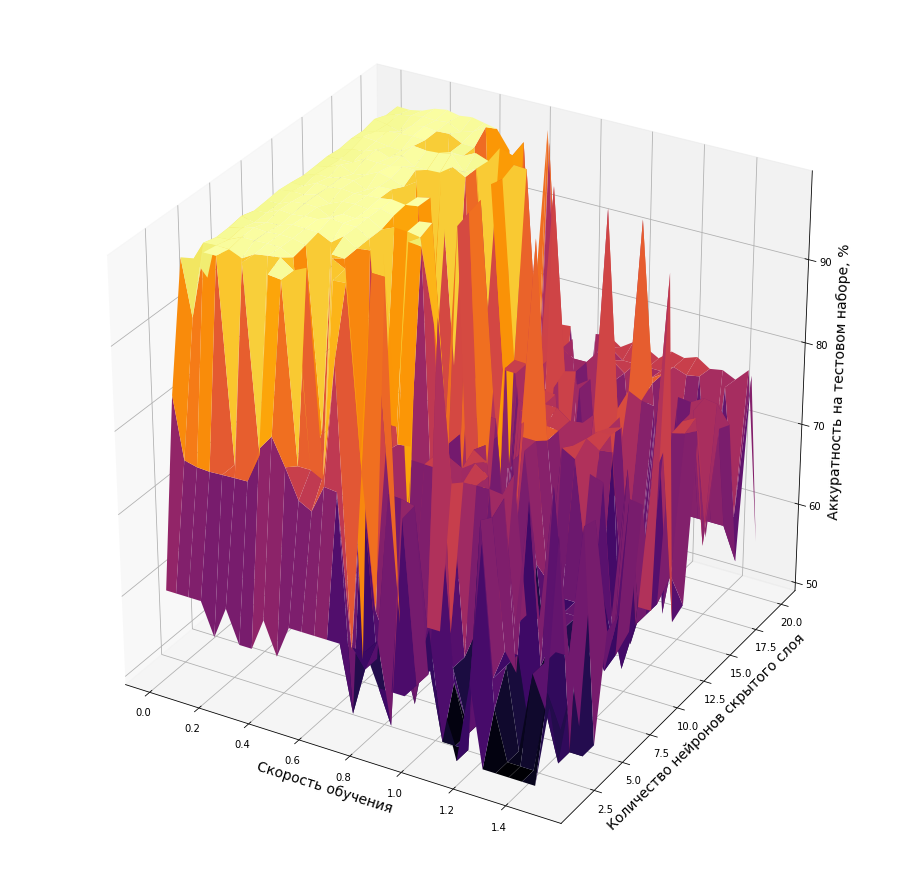

In [145]:
df = test_result.copy()

x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = np.array(df.values, dtype=np.float64)
fig = plt.figure()
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Скорость обучения', fontsize=14)
ax.set_ylabel('Количество нейронов скрытого слоя', fontsize=14)
ax.set_zlabel('Аккуратность на тестовом наборе, %', fontsize=14)
ax.plot_surface(X, Y, Z, cmap='inferno')

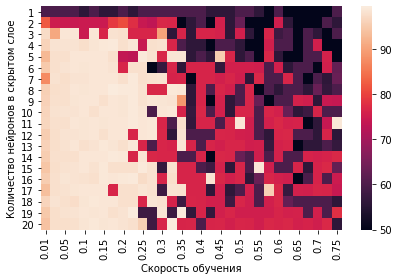

In [153]:
df = test_result.copy()
df = np.array(df.values, dtype=np.float64)
ax = sns.heatmap(df)
ax.set_xticklabels(test_result.columns, rotation=90)
ax.set_yticklabels(test_result.index)
ax.set_xlabel("Скорость обучения")
ax.set_ylabel("Количество нейронов в скрытом слое")
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

Все области светло-телесного цвета являются областями, где аккуратность ИНС на тестовом наборе больше 95%.

Более точно можно посмотреть, "вытаскивая" масксимумы из колонок. Дополнительно сделана отсечка по 95% аккуратости, чтобы отсеять "лучшие из худших" резульататов, которые видны на тепловой карте выше - бледно телесные среди красных и тёмных.

In [167]:
for col in test_result:
  max = test_result[col].max()
  for idx, acc in enumerate(test_result[col]):
    if acc >= max and acc >= 95:
      print(f'Для {idx+1} нейрона(ов) оптимальной скоростью является {col}.',
            f'При этом аккуратность составляет {acc:.2f}%.')
  

Для 3 нейрона(ов) оптимальной скоростью является 0.01. При этом аккуратность составляет 97.45%.
Для 4 нейрона(ов) оптимальной скоростью является 0.05. При этом аккуратность составляет 98.37%.
Для 3 нейрона(ов) оптимальной скоростью является 0.1. При этом аккуратность составляет 98.73%.
Для 6 нейрона(ов) оптимальной скоростью является 0.15. При этом аккуратность составляет 98.78%.
Для 15 нейрона(ов) оптимальной скоростью является 0.2. При этом аккуратность составляет 98.85%.
Для 18 нейрона(ов) оптимальной скоростью является 0.25. При этом аккуратность составляет 98.92%.
Для 13 нейрона(ов) оптимальной скоростью является 0.3. При этом аккуратность составляет 99.03%.
Для 8 нейрона(ов) оптимальной скоростью является 0.35. При этом аккуратность составляет 99.28%.
Для 8 нейрона(ов) оптимальной скоростью является 0.4. При этом аккуратность составляет 99.08%.
Для 19 нейрона(ов) оптимальной скоростью является 0.45. При этом аккуратность составляет 99.30%.
Для 15 нейрона(ов) оптимальной скоростью

Методом простого перебора числа нейронов и скорости обучения мы можем выбрать наилучший результат на тестовом наборе данных.
Однако, необходимо учитывать, что лучший результат при обучнеии и даже тесте не всегда может быть таковым - если тест не охватывает большое количество реальных примеров, можем получить очень сильное переобучение.
Модель может настолько сильно разделить пространство данных гиперплоскостями, что на тесте классификация будет отличная, но на реальных данных хуже, чем у более "слабой" на тесте модели.
При разработке моделей также нужно помнить о "шуме": случайных возмущениях, не зависящих от нашей воли. Даже для "аналоговых" приборов характерен шум, в примере с ирисами это может быть погрешность линейки, "дрогнувшая" рука, неправильная интерпретация записи и т.п. Более "сильная" модель может быть неустойчива к таким видам "шума".

В общем, при одинаковых активационных функциях, увеличению точности инс способствует "попадание" в оптимум скорсти обучения и выбора минимально достаточного количества нейронов в скрытом слое. 
Для сложных данных может быть полезно увеличение количества скрытых слоев.
Ухудшить точность сети может использование очень высоких или очень низких скоростей обучения: в первом случае мы "пролетим" мимо оптимума, во втором рискуем попасть в локальный минимум. Также негативное влияние оказывает выбор недостаточного числа нейронов скрытого слоя.
Число эпох, необходимых для обучения ИНС сильно зависит от скорости обучения - при низких скоростях потребуется больше времени, чтобы ИНС подобрала веса. В общем случае использовать число эпох как гиперпараметр не имеет смысла: сеть или недообучилась или обучислась и аккуратность слабо меняется от эпохи к эпохи, лучшим решением будет лимитировать верхний предел обучения и поставить остановку при достижении нужной точности или дельты между предыдущей и текущей точностью. 

---

